In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

In [67]:
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42)   

In [107]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', random_state = 42)
# 손실함수로 hinge를 쓰니 정확도가 올라갔다.
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)
          
# 검증세트를 가지고 손실함수를 바꿔가면 정확도를 체크 후 (튜닝 후)
# 남아있던 테스트셋으로 테스트.

0.6923076923076923

In [108]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'hinge', random_state = 42)
# 손실함수로 hinge를 쓰니 정확도가 올라갔다.
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

# hinge를 손실함수로 썼을 때 정확도가 가장 높다는 걸 검증세트로 부터 알아냄.

0.9230769230769231

In [130]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'hinge', random_state = 42)
# 손실함수로 hinge를 쓰니 정확도가 올라갔다.
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.9035087719298246

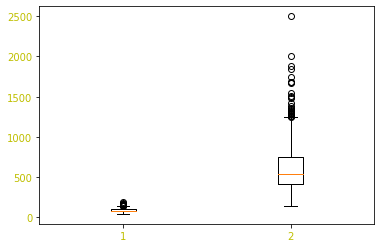

In [110]:
import matplotlib.pyplot as plt
plt.boxplot(x_train[:, 2:4])
plt.xticks(color = 'y')
plt.yticks(color = 'y')
plt.show()

# 두 특성의 값들의 크기들이 차이가 커 가중치가 불안정하게 업데이트된다.
# 가중치가 좀 더 안정적으로 업데이트되면 정확도도 올라가므로
# 스케일을 조정해준다.

In [111]:
import numpy as np
train_mean = np.mean(x_train, axis = 0)
train_std = np.std(x_train, axis = 0)

# 훈련세트의 평균과 표준편차를 구해서
# 검증, 테스트셋 모두 표준화시켜준다. ( z = (x - mean) / (std))

In [102]:
x_train_scaled = (x_train - train_mean) / train_std

In [116]:
x_val_scaled = (x_val - train_mean) / train_std

In [117]:
x_test_scaled = (x_test - train_mean) / train_std

In [126]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

# 표준화시키니 정확도가 올라갔다.

0.989010989010989

In [129]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', random_state = 42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_test_scaled, y_test)

# 표준화시키니 정확도가 올라갔다.

0.9473684210526315